# Network analysis On Airport routes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


importing datasets

In [2]:
DataF1=pd.read_csv("airports.csv")
DataF2=pd.read_csv("flights.csv")
DataF1.head()

,airport_id,city,state,name
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport


In [3]:
print(DataF1.shape)

(365, 4)


In [4]:
Df1=DataF1.loc[:,["airport_id","name"]]
x,y=Df1.shape

airports=[]
for i in range(x):
    airports.append(Df1.iloc[i,1])
#print(airname )  

In [5]:
Df2=DataF2.loc[:,["OriginAirportID","DestAirportID"]]
print(Df2.shape)
arrflight=[]
desflight=[]

(2482, 2)


In [6]:
x1,y1=Df2.shape
for i in range(x1):
    ArID=Df2.iloc[i,0]
    DesID=Df2.iloc[i,1]
    Dfnew1=Df1.loc[lambda df: df['airport_id'] == ArID]
    Dfnew2=Df1.loc[lambda df: df['airport_id'] == DesID]
    Arname=Dfnew1.iloc[0,1]
    Desname=Dfnew2.iloc[0,1]
    arrflight.append(Arname)
    desflight.append(Desname)

    
    #arrflight

In [7]:

availair=[]
for i in range(x):
    airports[i]
    if airports[i] in arrflight:
        availair.append(airports[i])
        
    elif airports[i] in desflight:
        availair.append(airports[i])
        
            
print(len(availair))


Dnw={'availflight':availair}
dfnw=pd.DataFrame(data=Dnw)
dfnw.head(10)
x2,y2=dfnw.shape

70


In [8]:
d = {'originLocation': arrflight, 'Destination Location': desflight,}
dfres = pd.DataFrame(data=d)
dfres.head(100)

,originLocation,Destination Location
0,Detroit Metro Wayne County,Miami International
1,Salt Lake City International,John F. Kennedy International
2,Portland International,Salt Lake City International
3,Lambert-St. Louis International,Detroit Metro Wayne County
4,Cincinnati/Northern Kentucky International,Los Angeles International
...,...,...
95,Minneapolis-St Paul International,Seattle/Tacoma International
96,Seattle/Tacoma International,Honolulu International
97,Newark Liberty International,Detroit Metro Wayne County
98,San Francisco International,John F. Kennedy International


In [9]:

routes=[]
for i in range (len(arrflight)):
    newlis=[]
    newlis.append(arrflight[i])
    newlis.append(desflight[i])
    routes.append(newlis)
newlis=[]

In [10]:
am = pd.DataFrame(np.zeros(shape=(x2,x2)), columns=dfnw['availflight'].unique(), index=dfnw['availflight'].unique())
for i in range(len(arrflight)):
    am.loc[arrflight[i],desflight[i]]=1
am.head(100)

,Ted Stevens Anchorage International,Phoenix Sky Harbor International,Tucson International,Bob Hope,Long Beach Airport,Los Angeles International,Metropolitan Oakland International,Ontario International,Sacramento International,San Diego International,...,Dallas Love Field,Dallas/Fort Worth International,George Bush Intercontinental/Houston,William P Hobby,San Antonio International,Salt Lake City International,Norfolk International,Richmond International,Seattle/Tacoma International,General Mitchell International
Ted Stevens Anchorage International,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Phoenix Sky Harbor International,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
Tucson International,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Bob Hope,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Long Beach Airport,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Salt Lake City International,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Norfolk International,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Richmond International,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Seattle/Tacoma International,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [11]:
admat=am.to_numpy()
print(admat)

[[0. 1. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


In [12]:
A =admat
mat_size = len(A)
print("Graph of Size", mat_size,":")
print(A)

Graph of Size 70 :
[[0. 1. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


--------------------------------------------------------------------------------------------------------------------------------

### Degree Centrality:

In [13]:
# creating a copy of Graph A:
temp = A.copy()

# to perform Summation of any Row:
def sum_of_row(graph, a):
    degSum = 0
    # Summing all columns in the row
    for column in range(mat_size):
        degSum += graph[a,column]
    return degSum
        
# Calculate Degree Centrality:
def degreeCentrality(a):
    degSum = sum_of_row(temp, a)
    # dividing the sum of the degree with the (n-1) nodes
    result = (degSum/(mat_size-1))
    
    # We return a single number.
    return result

In [14]:
# Calculate for all Nodes
degreeCentralityValues = [degreeCentrality(a) for a in range(mat_size)]
min_valued=min(degreeCentralityValues)
min_indexd=degreeCentralityValues.index(min_valued)
max_valued = max(degreeCentralityValues)
max_indexd = degreeCentralityValues.index(max_valued)
print("------------------------------------------------------------------------------")
print("Max degree centrality  is for ",availair[max_indexd]," : ",degreeCentralityValues[max_indexd])
print("Min degree centrality  is for ",availair[min_indexd]," : ",degreeCentralityValues[min_indexd])
print("Degree Centralities of the Graph: \n" )
for i in range (len(availair)):
    print(availair[i],":", degreeCentralityValues[i]) 

------------------------------------------------------------------------------
Max degree centrality  is for  Denver International  :  0.8985507246376812
Min degree centrality  is for  Dallas Love Field  :  0.14492753623188406
Degree Centralities of the Graph: 

Ted Stevens Anchorage International : 0.2028985507246377
Phoenix Sky Harbor International : 0.855072463768116
Tucson International : 0.21739130434782608
Bob Hope : 0.15942028985507245
Long Beach Airport : 0.18840579710144928
Los Angeles International : 0.7681159420289855
Metropolitan Oakland International : 0.3333333333333333
Ontario International : 0.18840579710144928
Sacramento International : 0.36231884057971014
San Diego International : 0.5797101449275363
San Francisco International : 0.7101449275362319
Norman Y. Mineta San Jose International : 0.3188405797101449
John Wayne Airport-Orange County : 0.2608695652173913
Denver International : 0.8985507246376812
Bradley International : 0.34782608695652173
Ronald Reagan Washingto

--------------------------------------------------------------------------------------------------------------------------------

### Betweenness Centrality: 

Initializing Graphs and Matrices:

In [15]:
# Using NetworkX only to calculate the shortest path:
import networkx as nx

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_matrix(temp)

In [16]:
# Creating a blank Step Matrix 
step_mat = np.zeros((mat_size,mat_size))
step_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Calculate Step Matrix for A[pow_size]:

In [17]:
# Calculate the steps in between nodes and save it in the step matrix:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

[[0. 1. 2. ... 2. 1. 2.]
 [1. 0. 1. ... 2. 1. 1.]
 [2. 1. 0. ... 2. 1. 2.]
 ...
 [2. 2. 2. ... 0. 2. 2.]
 [1. 1. 1. ... 2. 0. 1.]
 [2. 1. 2. ... 2. 1. 0.]]


Get the maximum value in the step_matrix:

In [18]:
pow_size = int(step_mat.max())+1

__CLAIM:__ The maximum no. in the step matrix will be the A_powers iteration when the values (except in the diagonal) would be greater than zero everytime

In [19]:
# Get a list of all powers of A up through the fifth power.
# We need to stop when all entries are positive
#A_powers = [np.linalg.matrix_power(A,m) for m in [1,2,3,4,5]]
A_powers = [np.linalg.matrix_power(A,m) for m in range(1,pow_size)]

In [20]:
A_powers

[array([[0., 1., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 0., 1., 1.],
        [0., 1., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 1., 0.]]),
 array([[14., 13., 10., ...,  4., 13.,  9.],
        [13., 59., 14., ..., 16., 48., 25.],
        [10., 14., 15., ...,  5., 14., 11.],
        ...,
        [ 4., 16.,  5., ..., 17., 16., 14.],
        [13., 48., 14., ..., 16., 49., 23.],
        [ 9., 25., 11., ..., 14., 23., 28.]]),
 array([[ 157.,  595.,  176., ...,  181.,  521.,  296.],
        [ 594., 1960.,  724., ...,  739., 1720., 1211.],
        [ 177.,  726.,  204., ...,  223.,  623.,  363.],
        ...,
        [ 182.,  738.,  223., ...,  260.,  592.,  433.],
        [ 521., 1724.,  622., ...,  594., 1480., 1010.],
        [ 297., 1215.,  363., ...,  435., 1010.,  692.]])]

Compute the __sigma values__ for nodes i and j, __with no middle node__ considered:

In [21]:
# Define a matrix. Next, we will fill it up entry by entry:
sigma = np.zeros((mat_size,mat_size))
sigma

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

__CLAIM:__ The length of a shortest path from i to j is the smallest m such that the i,j entry of A^m is nonzero. Therefore, the number of shortest paths from i to j is the i,j entry of A^m for this particular m.

use a nested loop to build sigma. Also __keep track of the minimal lengths for each pair of nodes.__

In [22]:
min_lengths = np.zeros((mat_size,mat_size))
min_lengths

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
for i in range(mat_size):
    for j in range(mat_size):
        for x in range(pow_size-1):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break

Now compute the other terms, which depend on one node at a time. So, let's __repeat the above calculation with node j isolated from the rest of the graph, then subtract.__

In [24]:
def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(mat_size)
    B[:,j] = np.zeros(mat_size)
    B_powers = [np.linalg.matrix_power(B,m) for m in [1,2,3,4,5]] ##[1,2,3,4,5]]
    B_sigma = np.zeros((mat_size,mat_size))
    B_min_lengths = np.zeros((mat_size,mat_size))
    for i in range(mat_size):
        for k in range(mat_size):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)

Define a function that takes a node number and returns its betweenness centrality value!

In [25]:
def betweenness_centrality(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(mat_size):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [26]:
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
min_valueb=min(betweennessCentralityValues)
min_indexb=betweennessCentralityValues.index(min_valueb)
max_valueb = max(betweennessCentralityValues)
max_indexb = betweennessCentralityValues.index(max_valueb)
print("------------------------------------------------------------------------------")
print("Max betweenness centrality  is for ",availair[max_indexb]," : ",betweennessCentralityValues[max_indexb])
print("Min betweenness centrality  is for ",availair[min_indexb]," : ",betweennessCentralityValues[min_indexb])
print("Betweenness centralities of the Graph: \n" )
for i in range (len(availair)):
    print(availair[i],":", betweennessCentralityValues[i])

------------------------------------------------------------------------------
Max betweenness centrality  is for  Denver International  :  72.10599147151709
Min betweenness centrality  is for  Tucson International  :  0.06340579710144928
Betweenness centralities of the Graph: 

Ted Stevens Anchorage International : 1.0162512925670821
Phoenix Sky Harbor International : 61.267587556321395
Tucson International : 0.06340579710144928
Bob Hope : 0.2585561497326203
Long Beach Airport : 0.7842536548418902
Los Angeles International : 33.6550737729845
Metropolitan Oakland International : 7.269377843217829
Ontario International : 0.4066841690562918
Sacramento International : 5.89690147038089
San Diego International : 13.529970297382437
San Francisco International : 34.87446145756629
Norman Y. Mineta San Jose International : 3.9475679318254664
John Wayne Airport-Orange County : 1.144494040440017
Denver International : 72.10599147151709
Bradley International : 1.7384277816850968
Ronald Reagan Wash

--------------------------------------------------------------------------------------------------------------------------------

### Closeness Centrality:

In [27]:
def closenessCentrality(b):
    closeSum = sum_of_row(step_mat, b)
    
    # dividing the (n-1) nodes with the sum of the closeness_values 
    result = ((mat_size-1)/closeSum)
    
    # We return a single number.
    return result

In [28]:
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
    
min_valueL=min(closenessCentralityValues)
min_indexL=closenessCentralityValues.index(min_valueL)
max_valueL = max(closenessCentralityValues)
max_indexL = closenessCentralityValues.index(max_valueL)
print("------------------------------------------------------------------------------")
print("Max closeness centrality  is for ",availair[max_indexL]," : ",closenessCentralityValues[max_indexL])
print("Min closeness centrality  is for ",availair[min_indexL]," : ",closenessCentralityValues[min_indexL])
print( "Closeness Centralities: \n" )
for i in range (len(availair)):
    print(availair[i],":", closenessCentralityValues[i])

------------------------------------------------------------------------------
Max closeness centrality  is for  Denver International  :  0.9078947368421053
Min closeness centrality  is for  Dallas Love Field  :  0.5307692307692308
Closeness Centralities: 

Ted Stevens Anchorage International : 0.5564516129032258
Phoenix Sky Harbor International : 0.8734177215189873
Tucson International : 0.5609756097560976
Bob Hope : 0.5390625
Long Beach Airport : 0.552
Los Angeles International : 0.8117647058823529
Metropolitan Oakland International : 0.6
Ontario International : 0.552
Sacramento International : 0.6106194690265486
San Diego International : 0.7040816326530612
San Francisco International : 0.7752808988764045
Norman Y. Mineta San Jose International : 0.5948275862068966
John Wayne Airport-Orange County : 0.575
Denver International : 0.9078947368421053
Bradley International : 0.6052631578947368
Ronald Reagan Washington National : 0.696969696969697
Washington Dulles International : 0.793103

--------------------------------------------------------------------------------------------------------------------------------

### Eigenvector Centrality:

Computing Eigen Values and Eigen Vector of the Graph

In [29]:
# Calculating Eigens of the graph
w,v = np.linalg.eig(temp)

In [30]:
# The eigenvalues of the graph
#print("Eigen Values of the Graph: \n",w)

# The eigenvectors of the graph
#print("Eigen Values of the Graph: \n",v)

Getting the maximum absolute Eigen Value and it's respective Eigen Vector

In [31]:
# Index of the Maximum Absolute Eigen Value of the graph
index = (np.abs(max(w, key=abs))).argmax()

# Respective Eigen Vector of the maximum Eigen Value
eigenCentralityValues = [v[ecv,index] for ecv in range(mat_size)]

min_valuec=min(eigenCentralityValues)
min_indexc=eigenCentralityValues.index(min_valuec)
max_valuec = max(eigenCentralityValues)
max_indexc = eigenCentralityValues.index(max_valuec)
print("------------------------------------------------------------------------------")
print("Max eigenvector centrality  is for ",availair[max_indexc]," : ",eigenCentralityValues[max_indexc])
print("Min eigenvector centrality  is for ",availair[min_indexc]," : ",eigenCentralityValues[min_indexc])
print("Eigen Vector Centralities of the Graph: \n" )
for i in range (len(availair)):
    print(availair[i],":", eigenCentralityValues[i])

------------------------------------------------------------------------------
Max eigenvector centrality  is for  Dallas Love Field  :  (-0.029696530219190078+0j)
Min eigenvector centrality  is for  Hartsfield-Jackson Atlanta International  :  (-0.1771755213773857+0j)
Eigen Vector Centralities of the Graph: 

Ted Stevens Anchorage International : (-0.04520357005701129+0j)
Phoenix Sky Harbor International : (-0.16727873514370503+0j)
Tucson International : (-0.055937698361817965+0j)
Bob Hope : (-0.034105887056377925+0j)
Long Beach Airport : (-0.039571758109663034+0j)
Los Angeles International : (-0.15963697284196685+0j)
Metropolitan Oakland International : (-0.061892143763288054+0j)
Ontario International : (-0.04215247583884988+0j)
Sacramento International : (-0.07834612845889792+0j)
San Diego International : (-0.12690598899226632+0j)
San Francisco International : (-0.14401206199588362+0j)
Norman Y. Mineta San Jose International : (-0.06933406676819705+0j)
John Wayne Airport-Orange Coun

--------------------------------------------------------------------------------------------------------------------------------

### Comparing the Computed values with the Networkx solutions: 

In [32]:
# Converting the graph to a NetworkX Graph:
H = nx.from_numpy_matrix(A)

In [33]:
print("------------------------------------------------------------------------------------------------------------------------")
degreeCentralityValues = [degreeCentrality(a) for a in range(mat_size)]
print("Calculated Degree Centralities: \n", degreeCentralityValues)
print("\nNetworkX Degree Centralities: \n", nx.degree_centrality(H))

print("------------------------------------------------------------------------------------------------------------------------")
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Calculated Betweenness Centralities: \n", betweennessCentralityValues)
print("\nNetworkX Betweenness Centralities: \n", nx.betweenness_centrality(H, normalized=False).values())

print("------------------------------------------------------------------------------------------------------------------------")
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Calculated Closeness Centralities: \n", closenessCentralityValues)
print("\nNetworkX Closeness Centralities: \n", nx.closeness_centrality(H))

print("------------------------------------------------------------------------------------------------------------------------")
eigenCentralityValues = [v[ecv,index] for ecv in range(mat_size)]
print("Calculated Eigen Vector Centralities: \n", eigenCentralityValues)
print("\nNetworkX Eigen Vector Centralities: \n", nx.eigenvector_centrality(H))
print("------------------------------------------------------------------------------------------------------------------------")


------------------------------------------------------------------------------------------------------------------------
Calculated Degree Centralities: 
 [0.2028985507246377, 0.855072463768116, 0.21739130434782608, 0.15942028985507245, 0.18840579710144928, 0.7681159420289855, 0.3333333333333333, 0.18840579710144928, 0.36231884057971014, 0.5797101449275363, 0.7101449275362319, 0.3188405797101449, 0.2608695652173913, 0.8985507246376812, 0.34782608695652173, 0.5652173913043478, 0.7391304347826086, 0.6231884057971014, 0.391304347826087, 0.34782608695652173, 0.5797101449275363, 0.7246376811594203, 0.6231884057971014, 0.2753623188405797, 0.8985507246376812, 0.30434782608695654, 0.18840579710144928, 0.7391304347826086, 0.8985507246376812, 0.4057971014492754, 0.2898550724637681, 0.5072463768115942, 0.7536231884057971, 0.7101449275362319, 0.7681159420289855, 0.8405797101449275, 0.5652173913043478, 0.6376811594202898, 0.782608695652174, 0.4927536231884058, 0.2608695652173913, 0.7971014492753623

--------------------------------------------------------------------------------------------------------------------------------

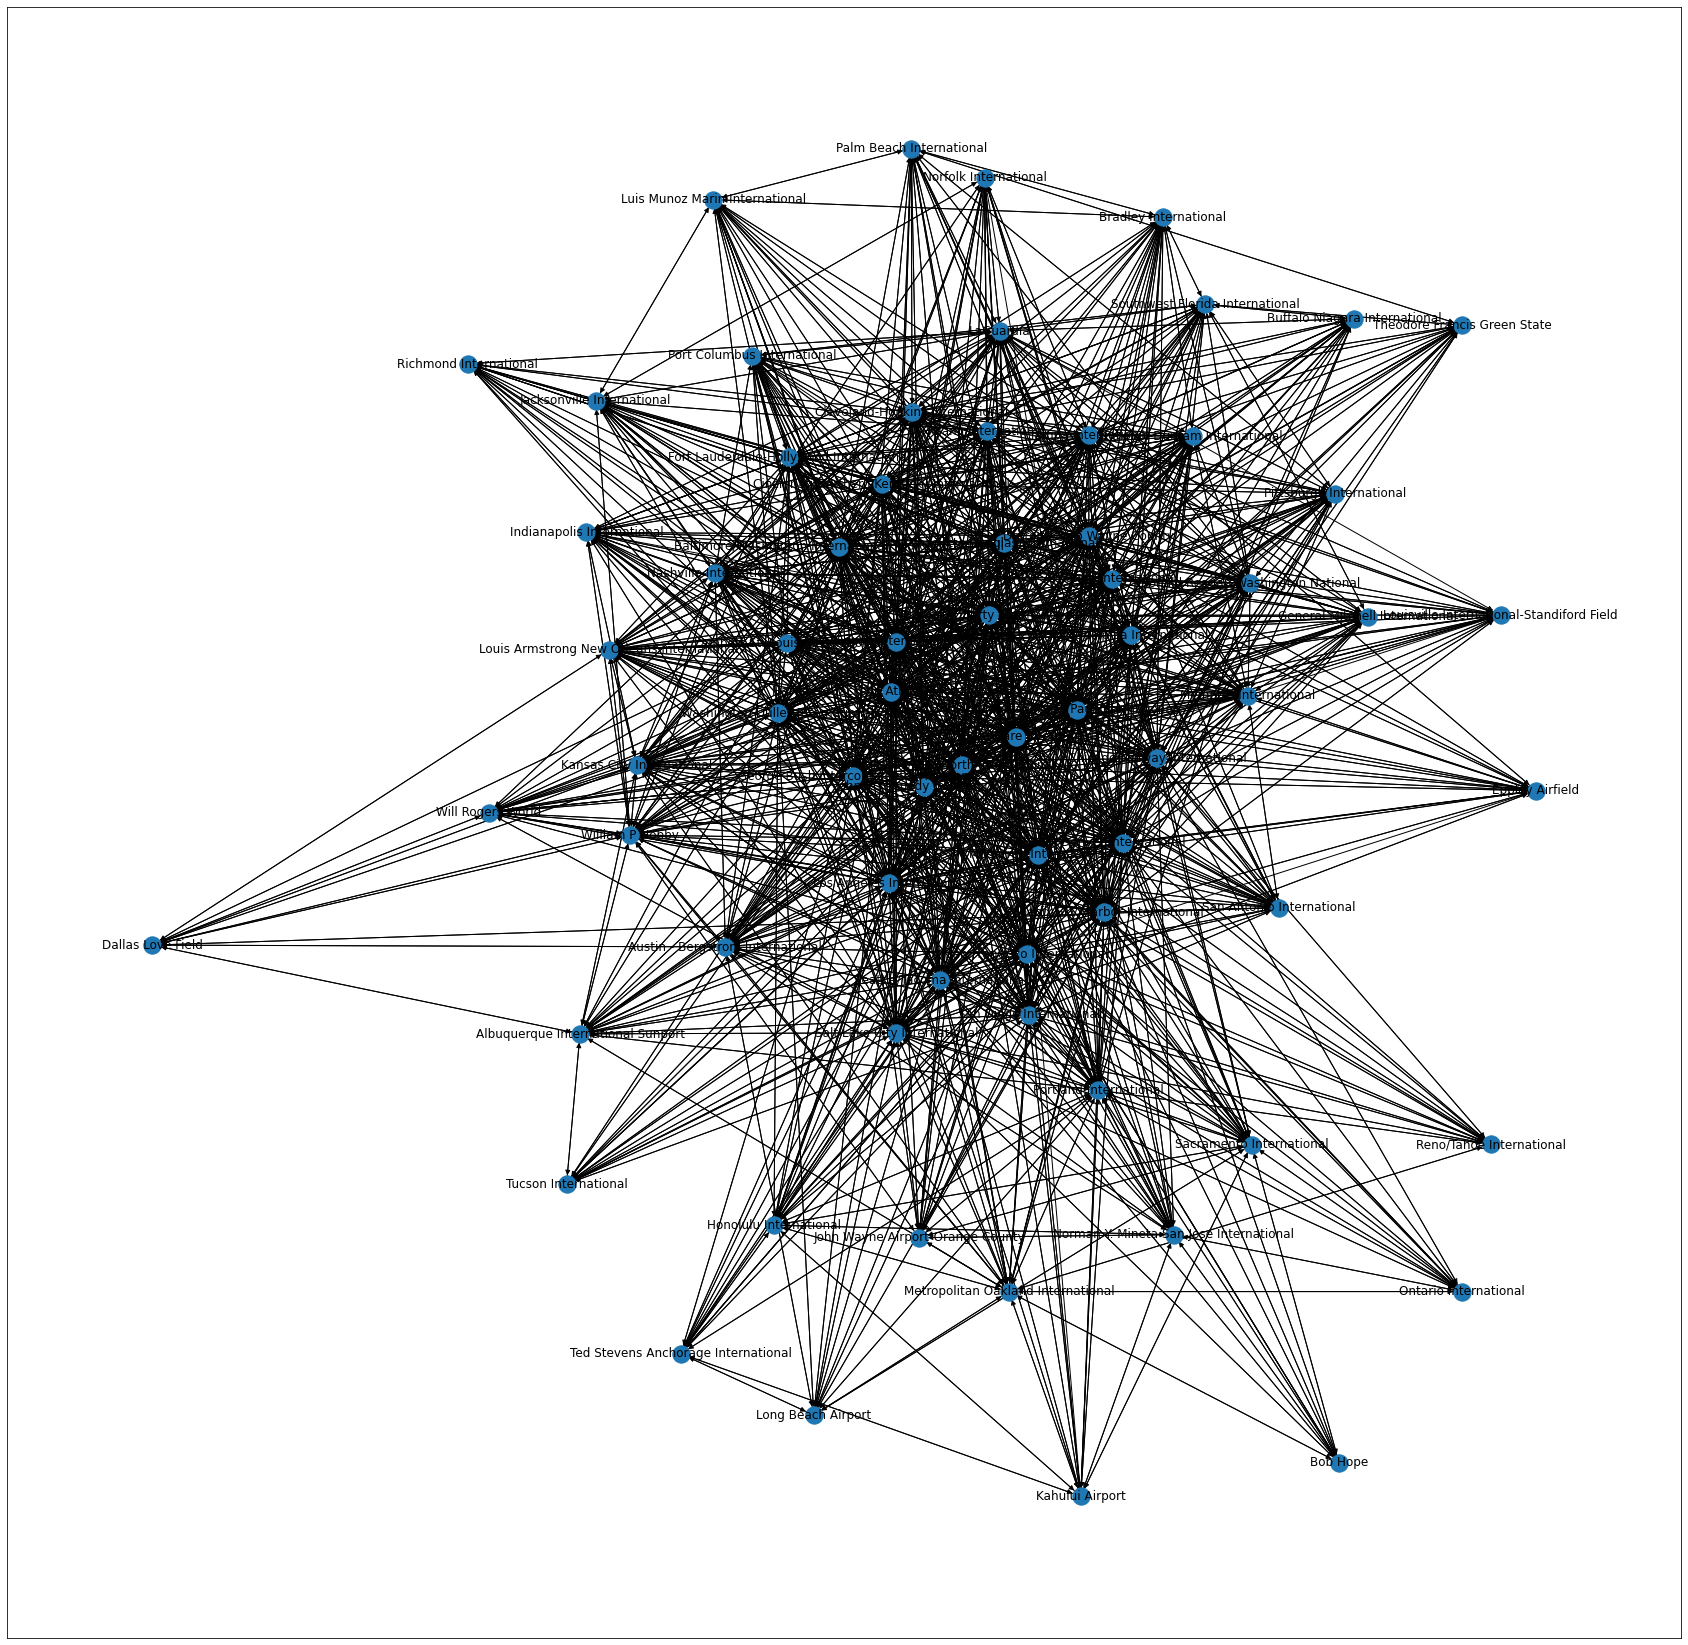

In [35]:
import networkx as nx 
G = nx.DiGraph()
  
G.add_edges_from(routes)
plt.figure(figsize =(30,30))   
nx.draw_networkx(G, with_label = True) 